# Updates on Pacific Islands Country 

## EDA

Three types of data about Pacific Islands are available:
- `Available Seats Kilometers`, a variable that measures the vacancy per flight. The equation is `Available Seats` * `The number of kilometers`, however, given there is no corresponding flight distace, the variable yields little value for further analysis.

- Thus, `Number of Flights in 7 Days` and `Number of Passengers in 7 Days` become the main focus of this analysis.

## Cross-country comparisons
### `Number of Flights in 7 Days`

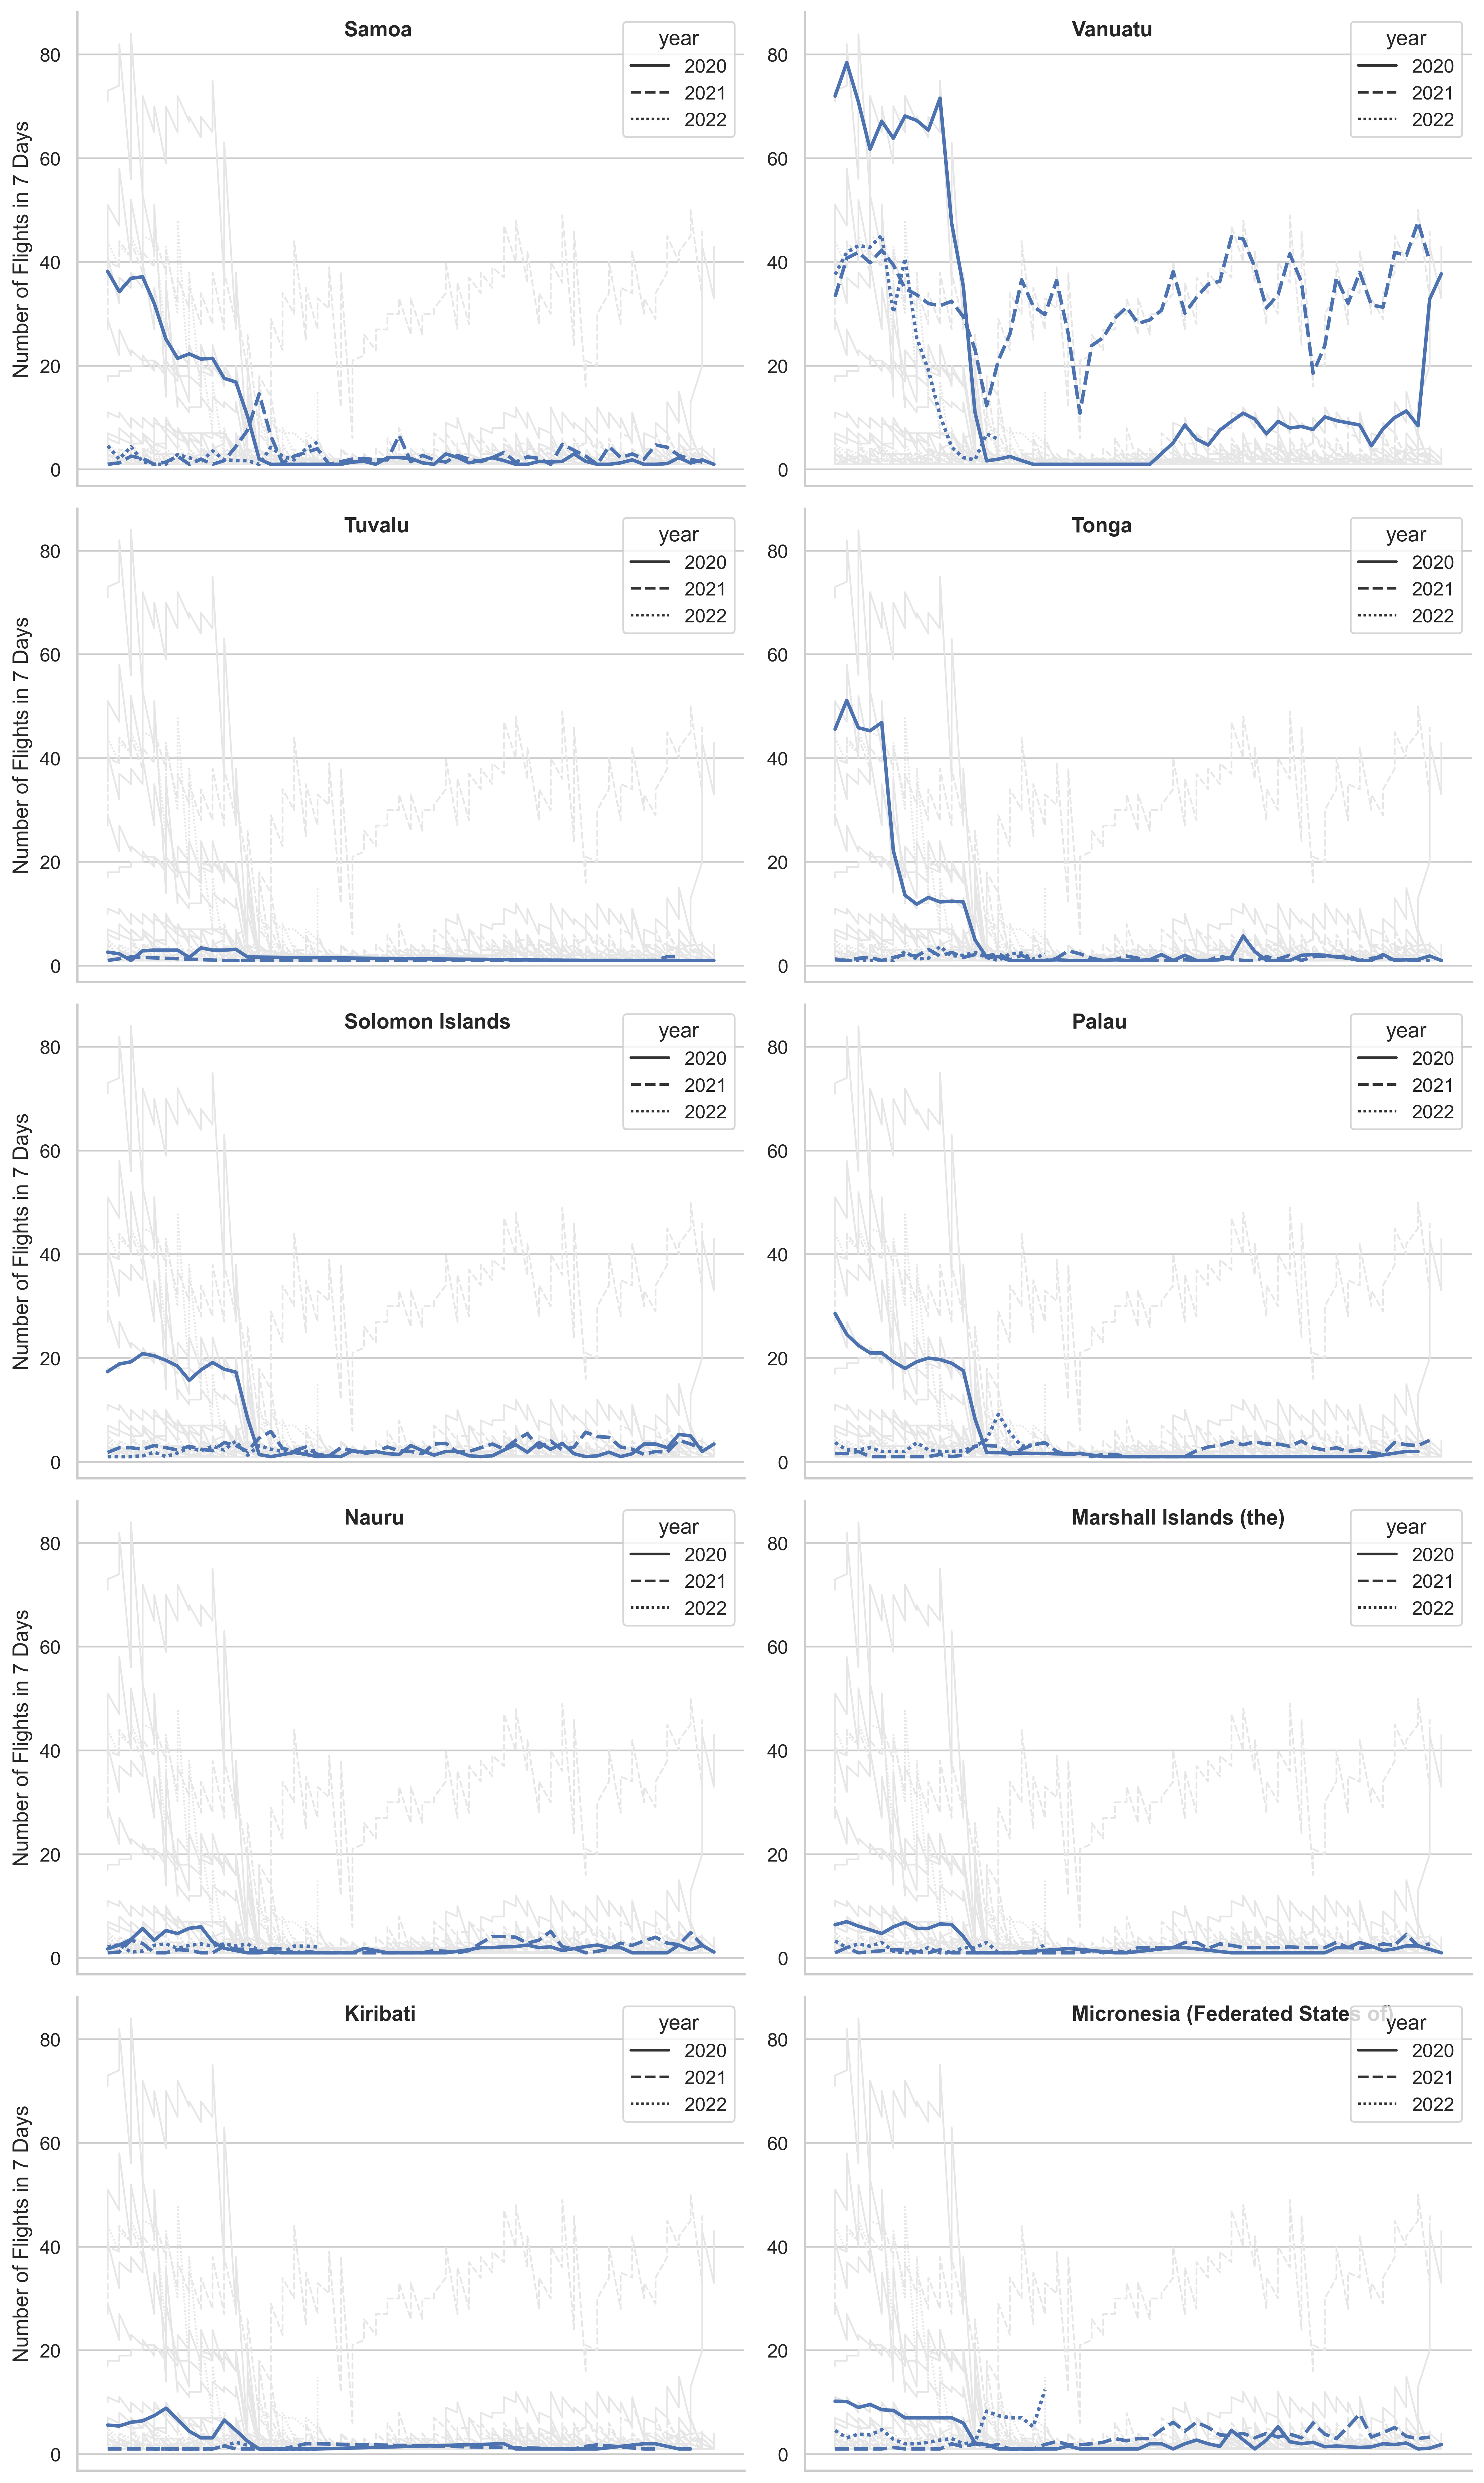

In [1]:
from IPython.display import Image
Image(filename='Viz/NumFlsIn7Days.png', height=800, width=600)

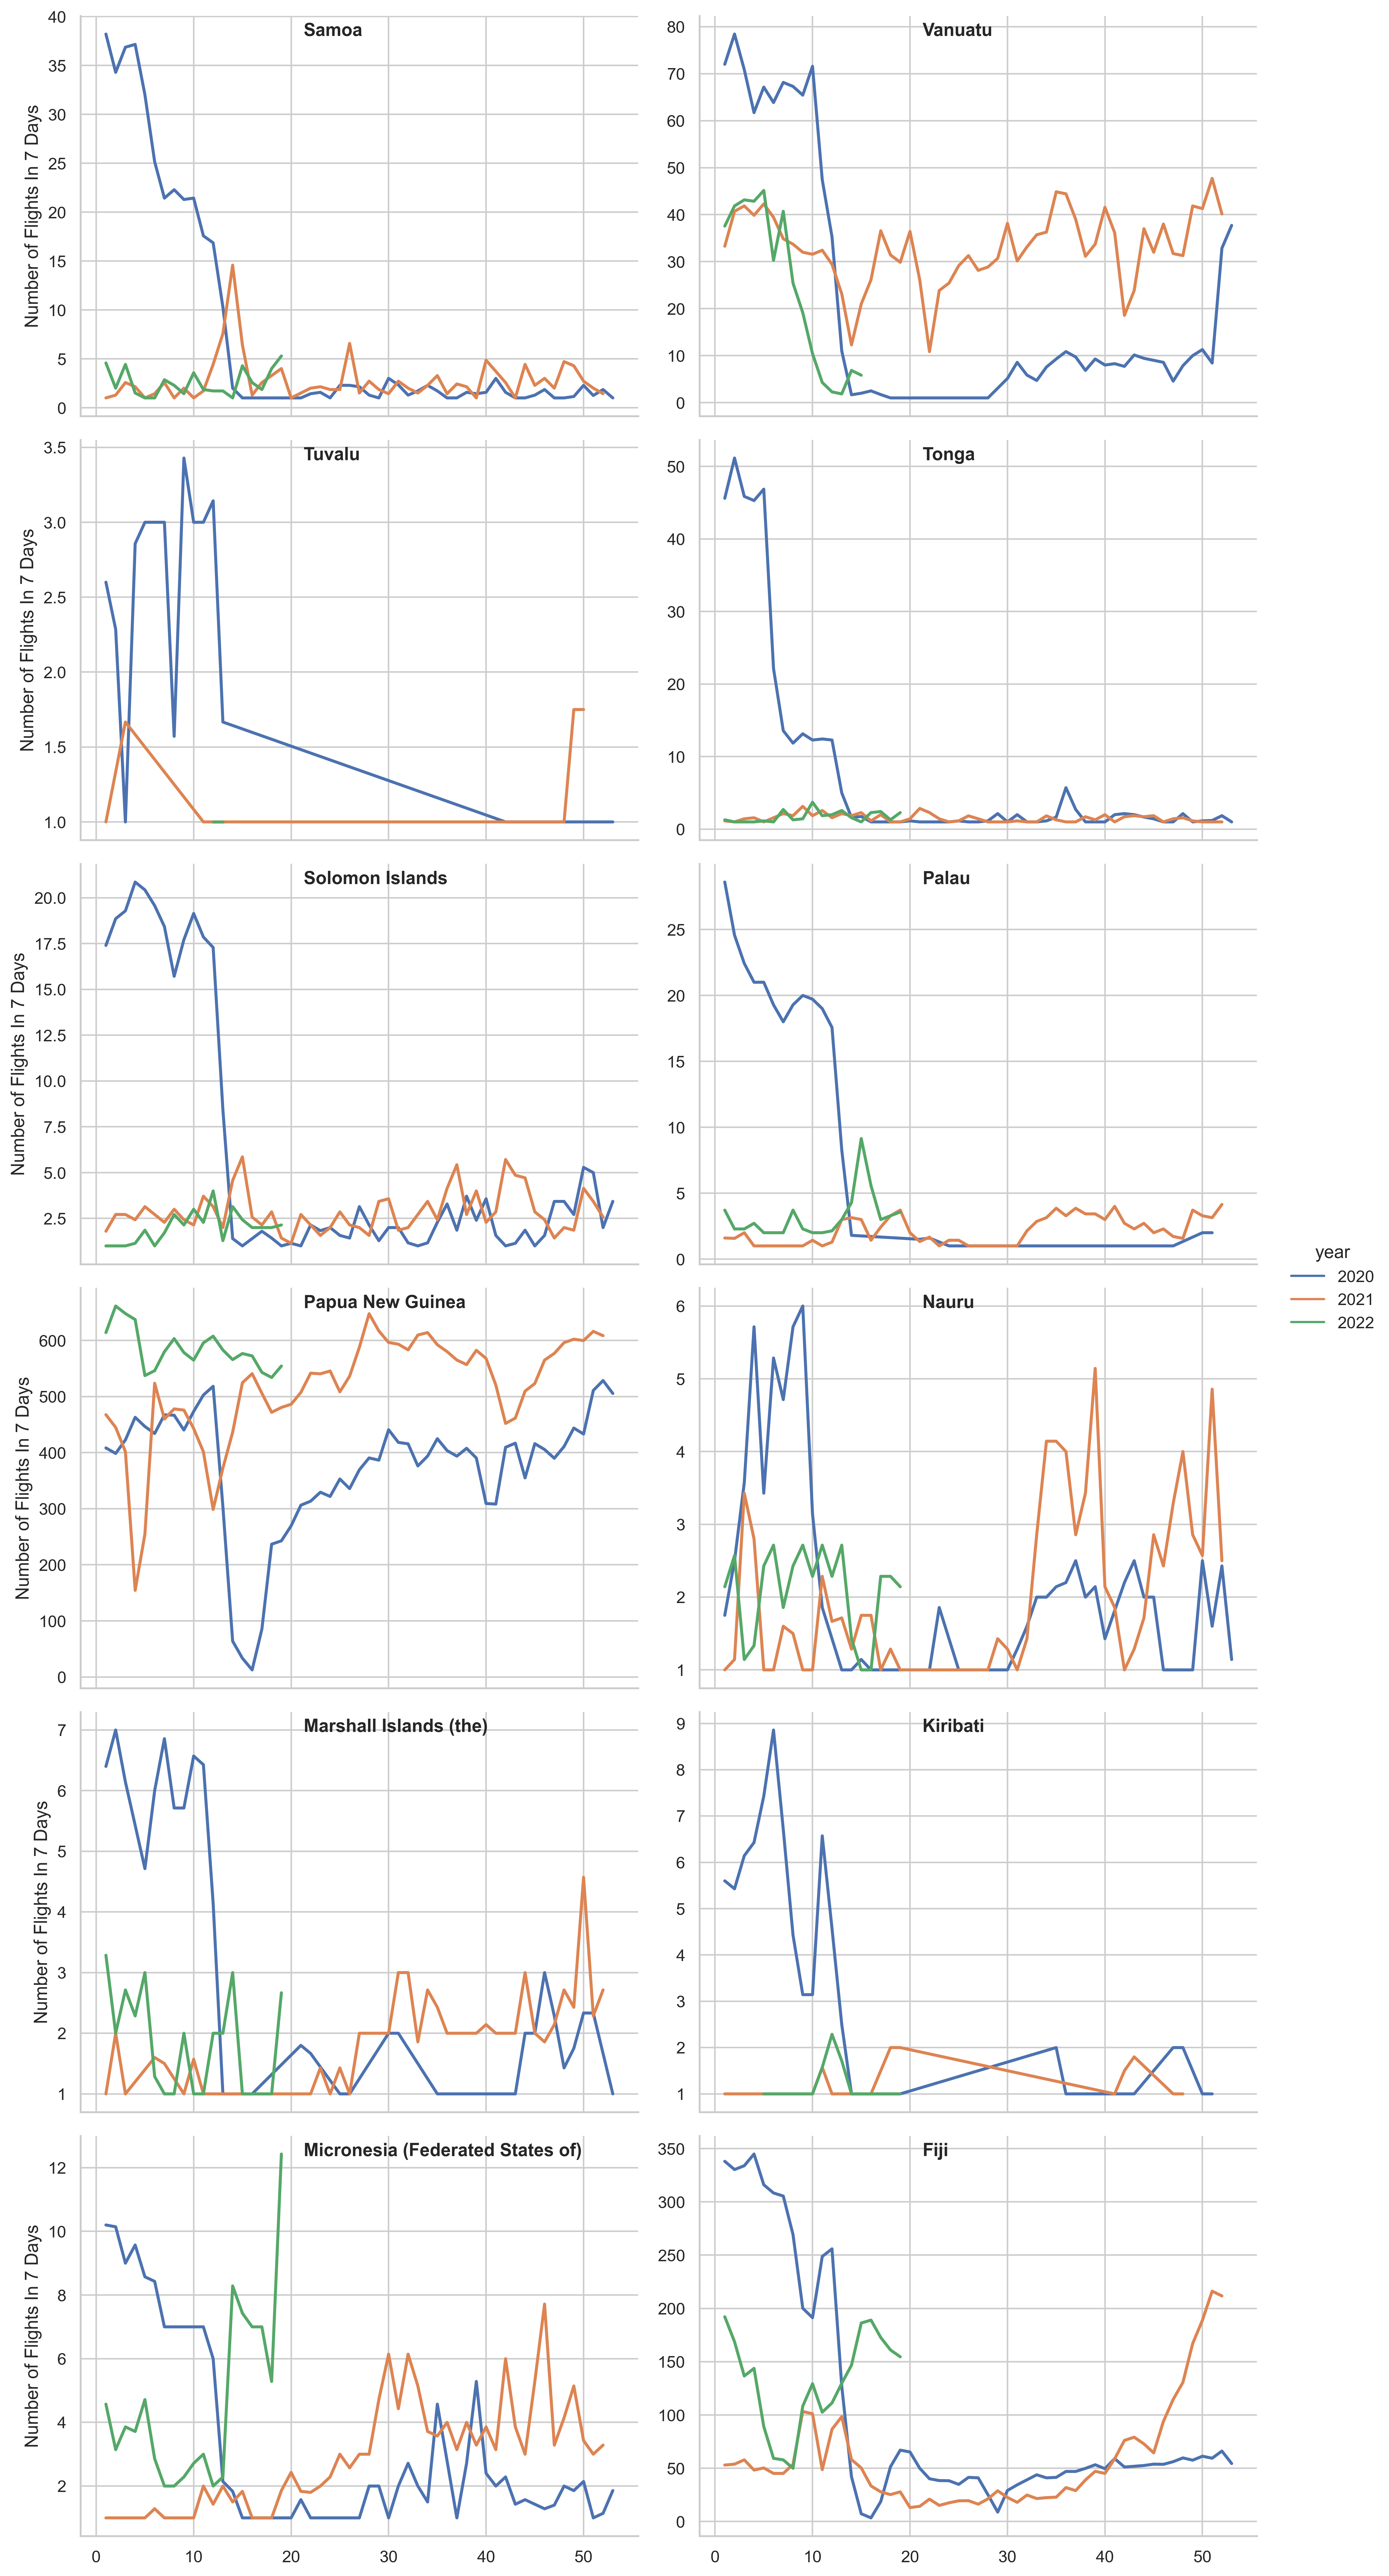

In [2]:
Image(filename='Viz/NumberFlsIn7Days_freescale.png', 
      height=800, width=600) 

In [3]:
from IPython.display import HTML
HTML(filename='Viz/fl.html')

## Number of Passengers in 7 Days

In [4]:
HTML(filename='Viz/psg.html')

# Statistical Properties
## Missing Data

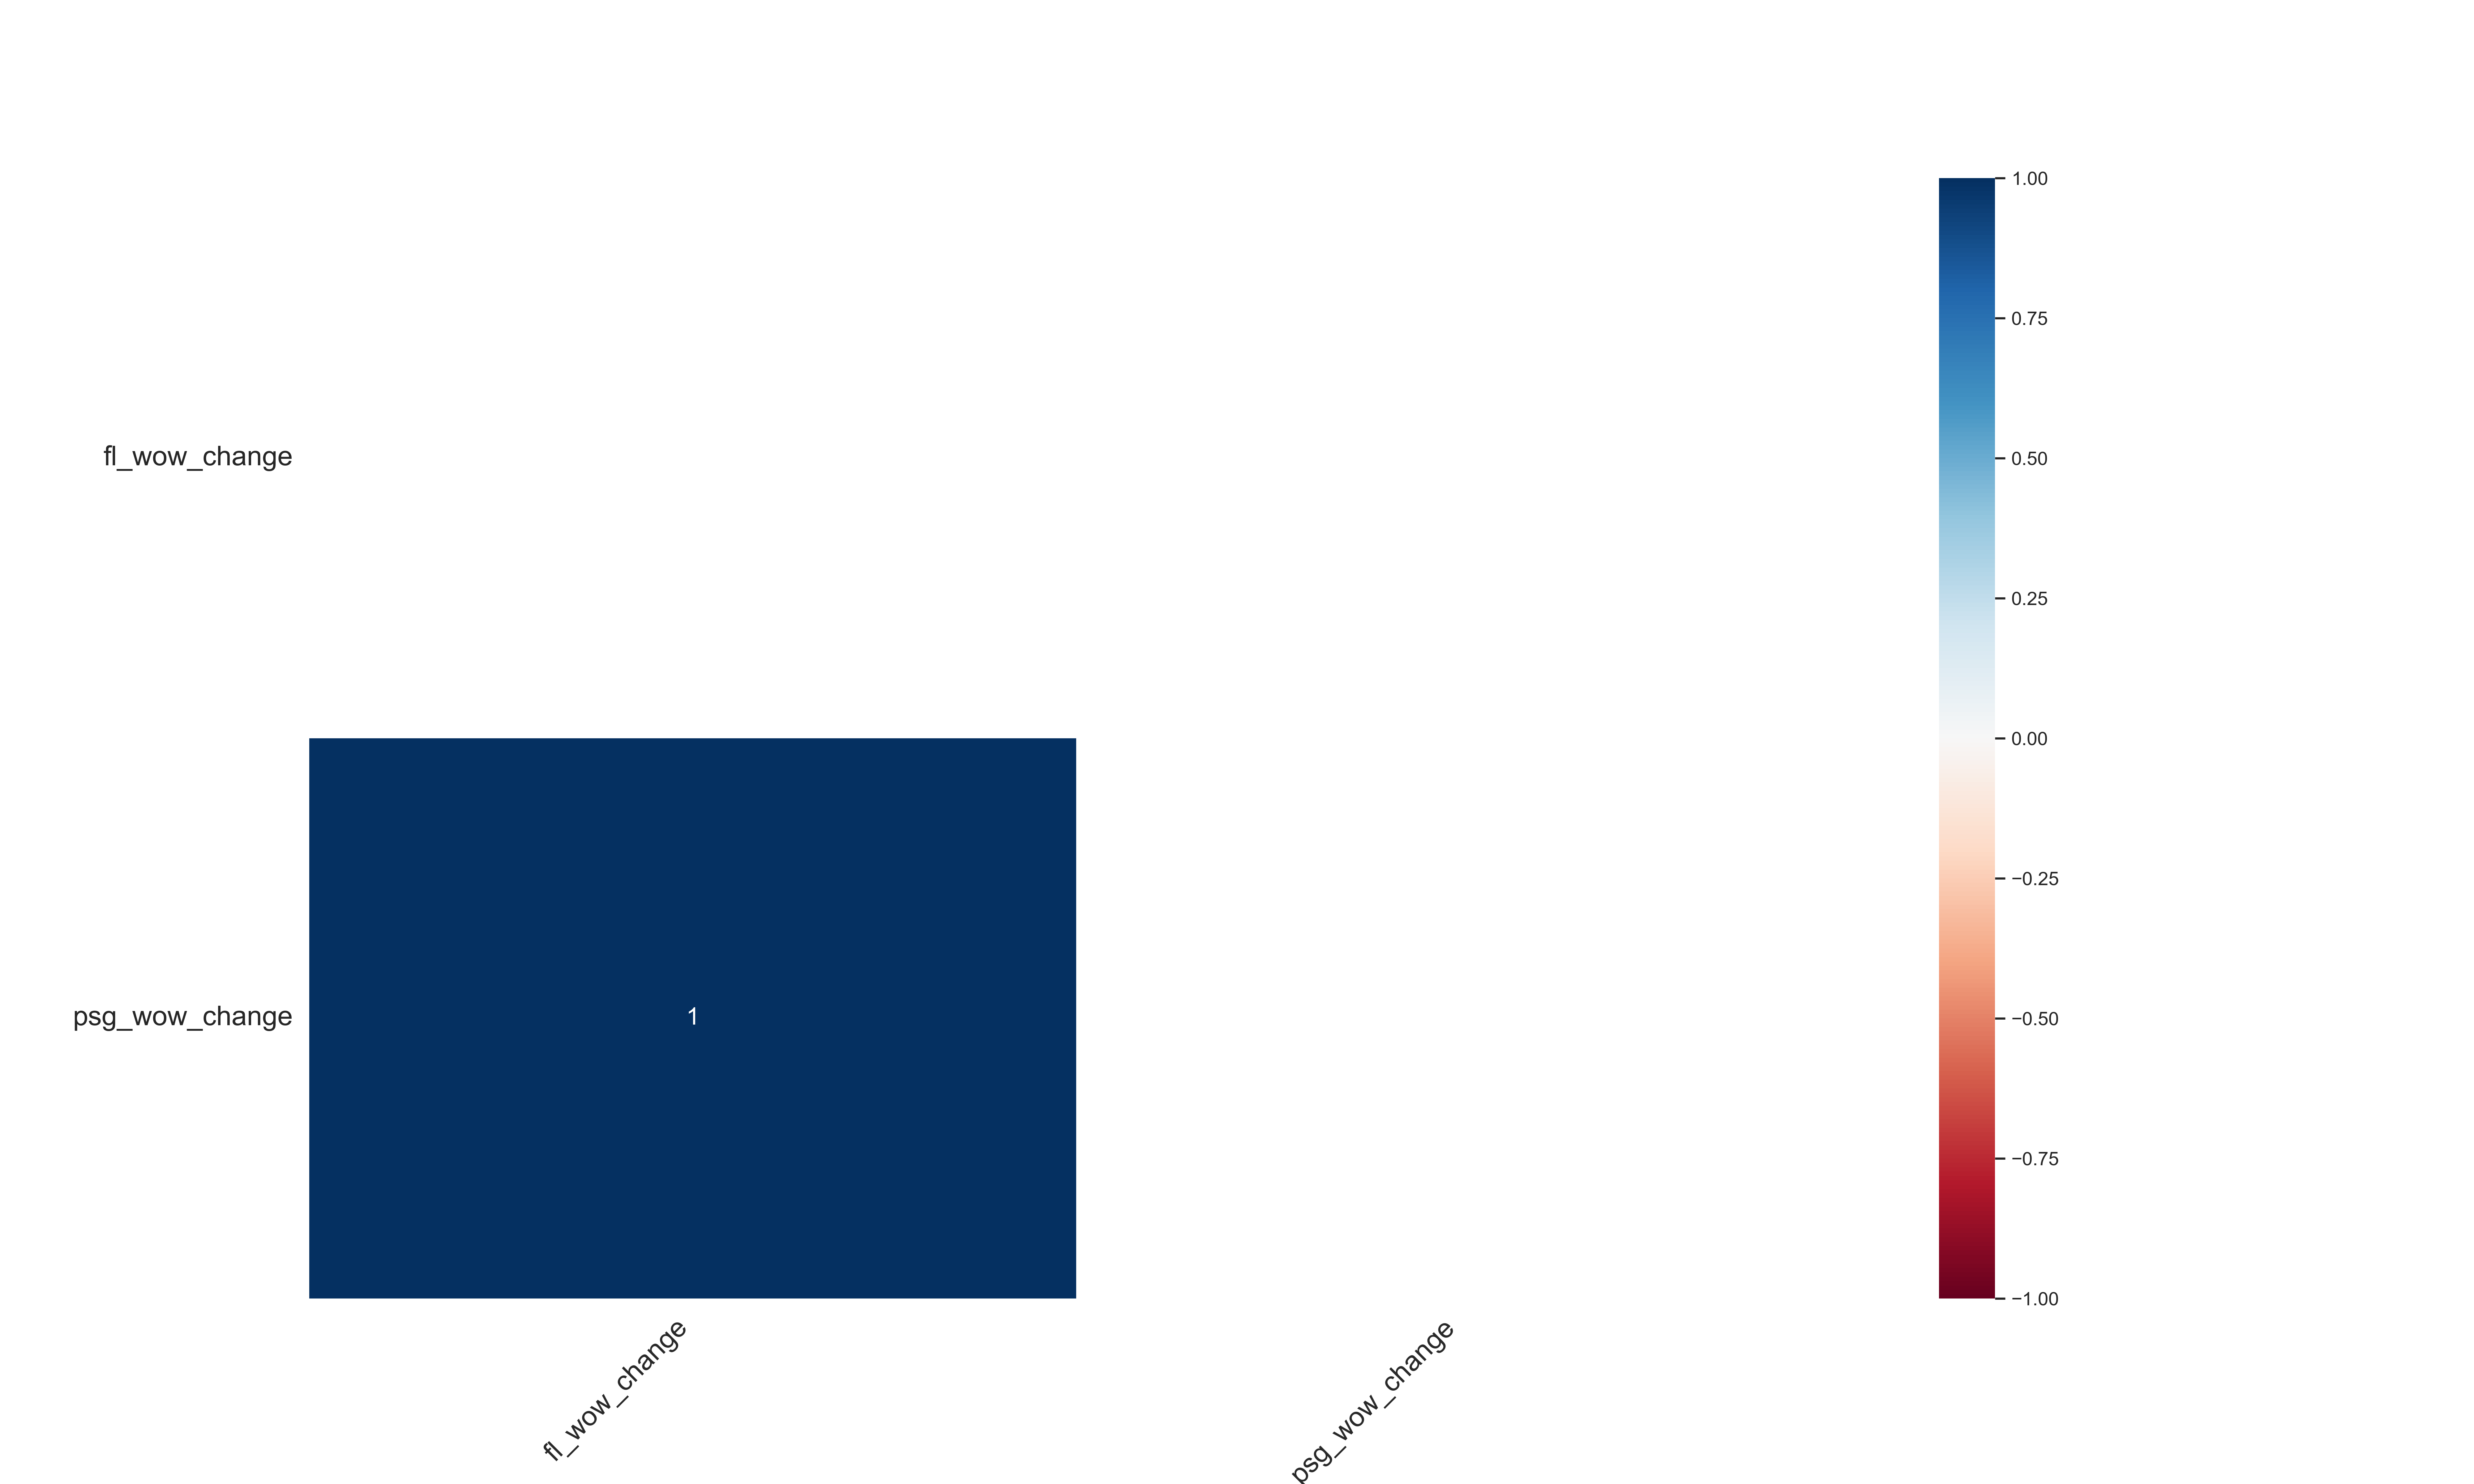

In [5]:
Image(filename='Viz/ms_heatmap.png', width=800) 

   Basically, from the heatmap displayed above, the missing columns `psg_wow_change` and `fl_wow_change` have exactly the same entry combinations missed. 
   
   Except for **Fiji** and **Papua New Guinea**, other countries get some proportion of the missing data, ranging from 11.38% in Tuvalu to 95.14% in Solomon Islands. Noted:
- `date_range` measures difference between the first and last recorded dates;
- `df_length` is the available dataframe's length; 
- `missing` counts the missing items in the available dataframe; and 
- `available` is the true aviliable counts over the recorded time periods.

In [7]:
import pandas as pd
missing = pd.read_csv("Output/missing_count.csv")
missing.drop("Unnamed: 0", axis=1).sort_values(by="ratio", ascending=False)

destination_country  missing  df_length  date_range  \
6                   Solomon Islands       20        843         865   
5                             Samoa       32        829         865   
7                             Tonga       41        822         865   
9                           Vanuatu       19        756         836   
2  Micronesia (Federated States of)      105        736         865   
4                             Palau      101        625         865   
3                             Nauru      166        668         865   
1            Marshall Islands (the)      126        586         865   
0                          Kiribati      150        294         864   
8                            Tuvalu       51        144         817   

   available      ratio  
6        823  95.144509  
5        797  92.138728  
7        781  90.289017  
9        737  88.157895  
2        631  72.947977  
4        524  60.578035  
3        502  58.034682  
1        460  53.179191  
0        144  16.666667  
8         93  11.383109

In line with missing data from the [Covid Stringency Index](https://github.com/OxCGRT/covid-policy-tracker), **Fiji**, **Papua New Guinea**, **Tonga**, and **Solomon Islands** are the countries with least missing data. A detailed count are displayed below:
- 1 out of 511 in TON is null.
- 6 out of 701 in SLB is null.
- 14 out of 957 in FJI is null.
- 14 out of 907 in PNG is null.
- 21 out of 483 in KIR is null.
- 21 out of 672 in VUT is null.
- 451 out of 451 in TUV is null.
- 387 out of 387 in PLW is null.
- 460 out of 460 in NRU is null.
- 859 out of 859 in MHL is null.
- 600 out of 600 in FSM is null.
- 664 out of 664 in WSM is null.

## Descriptive Statistics

### `Covid-Cutoff`

In [8]:
covid_compare = pd.read_csv("Output/covid_cutoff_stats.csv")
covid_compare

Unnamed: 0  flights_number_7days_before  flights_number_7days_after  \
0           Vanuatu                    26.792373                   29.347409   
1   Solomon Islands                     7.199248                    2.636678   
2  Papua New Guinea                   454.928571                  465.118774   
3              Fiji                   287.924051                   67.417513   

   flights_7days_change (in %)  passengers_number_7days_before  \
0                     9.536430                     3028.190678   
1                   -63.375645                      935.939850   
2                     2.239957                    34249.642857   
3                   -76.584967                    26749.341772   

   passengers_number_7days_after  passengers_7days_change (in %)  
0                    2553.804223                      -15.665673  
1                     386.366782                      -58.718845  
2                   32915.454662                       -3.895481  
3                    6948.908629                      -74.022132

## Variability
One way to detect the variability is to use z-score to measure how far it deviates from the mean.

In [9]:
import numpy as np
zscore = pd.read_csv("Output/z-score.csv").drop("Unnamed: 0", axis=1)
zscore.groupby("destination_country").apply(np.max, axis=0)

destination_country  \
destination_country                                                  
Fiji                                                          Fiji   
Kiribati                                                  Kiribati   
Marshall Islands (the)                      Marshall Islands (the)   
Micronesia (Federated States of)  Micronesia (Federated States of)   
Nauru                                                        Nauru   
Palau                                                        Palau   
Papua New Guinea                                  Papua New Guinea   
Samoa                                                        Samoa   
Solomon Islands                                    Solomon Islands   
Tonga                                                        Tonga   
Tuvalu                                                      Tuvalu   
Vanuatu                                                    Vanuatu   

                                        date  fl_zscore  psg_zscore  
destination_country                                                  
Fiji                              2022-05-15   3.559036    3.488758  
Kiribati                          2022-05-14   3.313215    3.223353  
Marshall Islands (the)            2022-05-15   3.379459    3.388422  
Micronesia (Federated States of)  2022-05-15   4.417831    5.061285  
Nauru                             2022-05-15   3.554112    3.617700  
Palau                             2022-05-15   3.760119    3.961421  
Papua New Guinea                  2022-05-15   1.581494    1.698900  
Samoa                             2022-05-15   4.543945    4.544906  
Solomon Islands                   2022-05-15   3.595390    3.892513  
Tonga                             2022-05-15   5.722493    4.538809  
Tuvalu                            2022-03-28   2.039153    2.039153  
Vanuatu                           2022-04-16   2.933568    3.356023

# Prospects
### Other Data Sources

[IMF Tourism Tracker](https://www.imf.org/en/Countries/ResRep/PIS-Region) provides an estimated visitor during 2020-2021. Their method is quoted as below:
> Chinese visitors to Fiji fell by 73 percent in February relative to a year earlier. And Chinese visitors to Palau accounted for 32 percent of total visitors in 2019. Multiplying the two percentages yields the percentage point contribution to the change in visitors to Palau from Chinese visitors. Adding up the contributions across all source countries yields the total 12-month percent change.

### Single Variable Time-Series Forecasting
**SARIMA** (Seasonal Autoregressive Integrated Moving Average), which could absorb the seasonal patterns (weekly, mouthly, quarterly, and yearly), might be the most useful model for us to explore. Covid factors need to be considered. A potential way to bypass that is to directly use the post-covid flight and passenger data.

**Interrupted Time Series (ITS)/Regression Discontinunity Design (RDD)** could be especially helpful to detec the treatment effects of the Covid-19.

In [10]:
import seaborn as sns

fiji = pd.read_csv("Data/Fiji.csv")[["date", "flights_number_7days"]]
its_df = fiji.assign(threshold=(fiji["date"] > "2020-03-24").astype(int))
its_df["date"] = pd.to_datetime(its_df["date"])

week_number = list()
for idx in its_df.index:
    delta = (its_df["date"][idx] - its_df["date"][0]).days // 7
    week_number.append(delta)

its_df["week"] = week_number
its_df["week_t"] = its_df["week"] - 11

In [11]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

model = smf.wls("flights_number_7days ~ threshold + week + week * threshold", its_df).fit()
its_df["fitted"] = model.fittedvalues
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Text(0.5, 1.0, 'Fiji - RDD Setup')

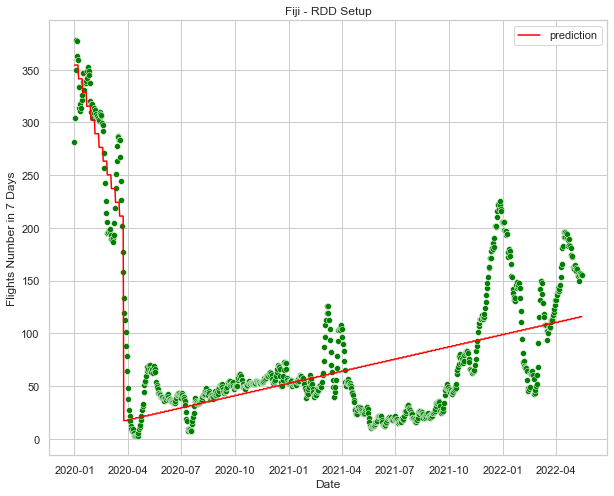

In [13]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style("whitegrid")
sns.scatterplot(x="date", y="flights_number_7days", data=its_df, color="green")
sns.lineplot(x="date", y="fitted", data=its_df,
             color="red", label="prediction")
plt.xlabel("Date")
plt.ylabel("Flights Number in 7 Days")
plt.title("Fiji - RDD Setup")

### Vector Autoregressive Approach (applicable to flight & passenger data)
Related to IMF's model, a country represented by $c$ at time $t$'s Flights $Y_{ct}$ could be seen as a linear regression of other countries (probably **Fiji**, **Papua New Guinea**, and **Solomon Islands**): \
$$Y_{ct} = \beta_{1} \text{Fiji}_{t} + \beta_2 \text{Papua New Guinea}_{t} + \beta_3 \text {Soloman Islands}_{t} + \epsilon \text{   for t} = 1,2,..., n $$
Then, it depends on $R^{2}$ (how much variance that we could explain) to measure the validity. What we can do is to check the granger's causality 